In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import cKDTree

In [2]:
base_df_path = "./DFwLoc/bklyn_df.csv"
base_df = pd.DataFrame(pd.read_csv(base_df_path))

In [3]:
# station coords
station_path = "../SimplifiedGeoJson/reduced_stations.json"
with open(station_path, 'r') as sfp:
    stations_dict = json.load(sfp)

In [4]:
station_coords = []
for f in stations_dict['features']:
    station_coords.append(f['coords'])

In [5]:
len(station_coords)

473

In [6]:
# coords in (long, lat) format
search_tree = cKDTree(station_coords)

In [7]:
def get_nearest_station(tree:cKDTree, point):
    dist, idx = tree.query([point], k=1)
    line = stations_dict['features'][idx[0]]['line']
    return dist[0], line

In [8]:
df = base_df

In [9]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode
0,brooklyn,Prospect Lefferts Gardens,620 Parkside Avenue,3.0,1.0,1067.73,3100.0,-73.952639,40.656024,11226.0
1,brooklyn,Williamsburg,1 N 4th Place,1.0,1.0,600.00,4597.0,-74.000048,40.678412,11231.0
3,brooklyn,Bensonhurst,1651 84th Street,2.0,1.0,600.00,1650.0,-74.004634,40.610703,11214.0
4,brooklyn,New_Dev,181 Front Street,2.0,2.0,1290.54,6496.0,-73.985988,40.702526,11201.0
5,brooklyn,East Flatbush,3420 Clarendon Road,1.0,1.0,624.88,1600.0,-73.944233,40.643375,11203.0


In [12]:
df['Dist_Nearest_Station'] = None
df['Nearest_Line'] = None

In [13]:
df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Dist_Nearest_Station,Nearest_Line
0,brooklyn,Prospect Lefferts Gardens,620 Parkside Avenue,3.0,1.0,1067.73,3100.0,-73.952639,40.656024,11226.0,None,None
1,brooklyn,Williamsburg,1 N 4th Place,1.0,1.0,600.00,4597.0,-74.000048,40.678412,11231.0,None,None
3,brooklyn,Bensonhurst,1651 84th Street,2.0,1.0,600.00,1650.0,-74.004634,40.610703,11214.0,None,None
4,brooklyn,New_Dev,181 Front Street,2.0,2.0,1290.54,6496.0,-73.985988,40.702526,11201.0,None,None
5,brooklyn,East Flatbush,3420 Clarendon Road,1.0,1.0,624.88,1600.0,-73.944233,40.643375,11203.0,None,None


In [22]:
k_nearests = []
k_nearests_ids = []

for i, row in df.iterrows():
    dist, line_name = get_nearest_station(search_tree, [row['Long'], row['Lat']])
    df.at[i, 'Dist_Nearest_Station'] = float(dist)
    df.at[i, 'Nearest_Line'] = line_name

In [23]:
df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Dist_Nearest_Station,Nearest_Line
0,brooklyn,Prospect Lefferts Gardens,620 Parkside Avenue,3.0,1.0,1067.73,3100.0,-73.952639,40.656024,11226.0,0.002638,2-5
1,brooklyn,Williamsburg,1 N 4th Place,1.0,1.0,600.00,4597.0,-74.000048,40.678412,11231.0,0.00543,F-G
3,brooklyn,Bensonhurst,1651 84th Street,2.0,1.0,600.00,1650.0,-74.004634,40.610703,11214.0,0.004249,D
4,brooklyn,New_Dev,181 Front Street,2.0,2.0,1290.54,6496.0,-73.985988,40.702526,11201.0,0.002925,F
5,brooklyn,East Flatbush,3420 Clarendon Road,1.0,1.0,624.88,1600.0,-73.944233,40.643375,11203.0,0.004935,2-5


In [24]:
df.describe()

,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode
count,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000
mean,1.838088,1.559368,1012.822334,3379.161912,-73.956279,40.677461,11219.179645
std,1.063485,15.208770,4701.250253,1635.862984,0.028992,0.032961,12.528191
min,0.500000,0.000000,210.000000,1100.000000,-74.039960,40.575032,11201.000000
25%,1.000000,1.000000,651.060000,2400.000000,-73.978259,40.656129,11209.000000
50%,2.000000,1.000000,847.940000,3000.000000,-73.955842,40.684491,11221.000000
75%,3.000000,1.500000,1129.890000,3850.000000,-73.936089,40.697694,11226.000000
max,6.000000,1000.000000,308957.060000,25000.000000,-73.856720,40.737375,11385.000000


In [25]:
sns.set_theme(style="ticks")

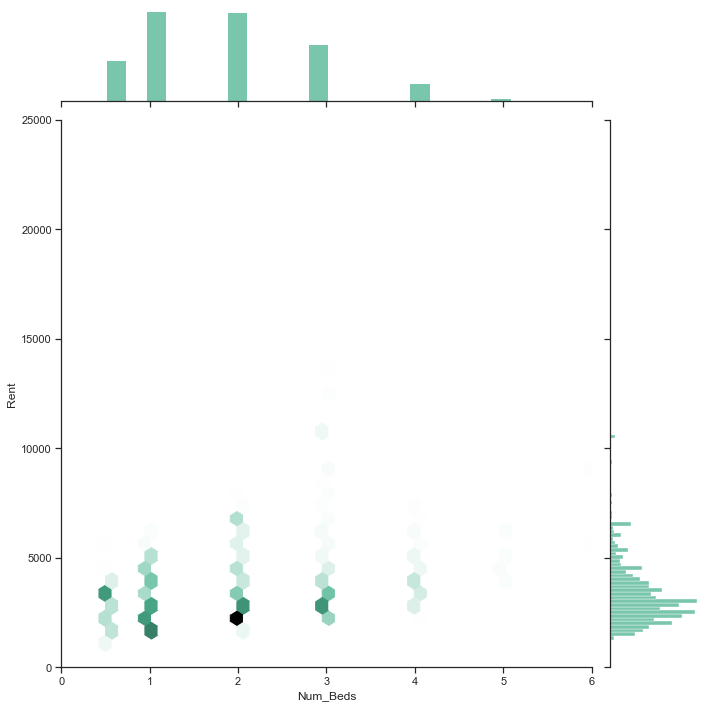

In [43]:
x = df['Num_Beds']
y = df['Rent']

xmax = df['Num_Beds'].max()
ymax = df['Rent'].max()

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391", xlim=(0, xmax), ylim=(0, ymax), height=10)

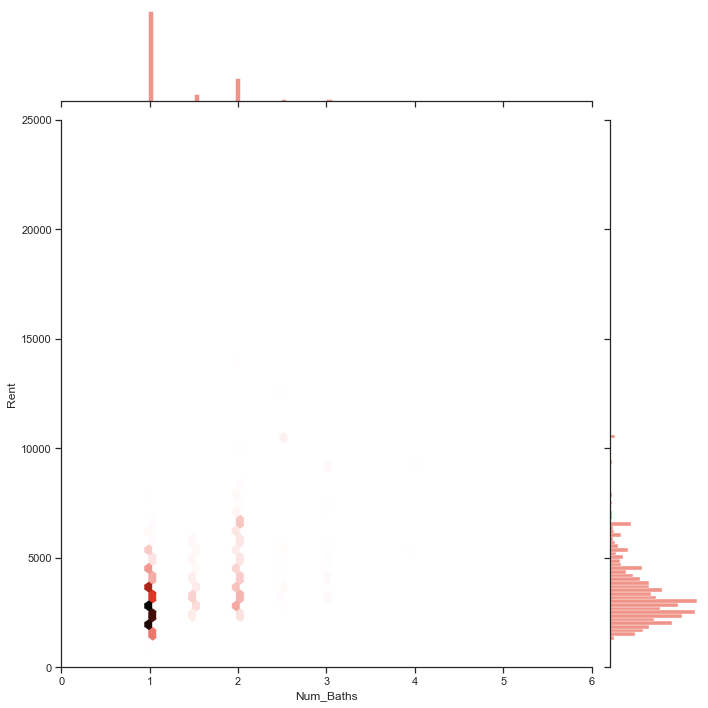

In [86]:
data = df[df['Num_Baths'] < 6]

x = data['Num_Baths']
y = data['Rent']

xmax = 6
ymax = df['Rent'].max()
sns.jointplot(x=x, y=y, kind="hex", color="#EC7063", xlim=(0, xmax), ylim=(0, ymax), height=10)

In [70]:
max_rent = df['Rent'].max()
min_rent = df['Rent'].min()

max_size = df['Sq-Ft'].max()
min_size = df['Sq-Ft'].min()

<AxesSubplot:xlabel='Long', ylabel='Lat'>

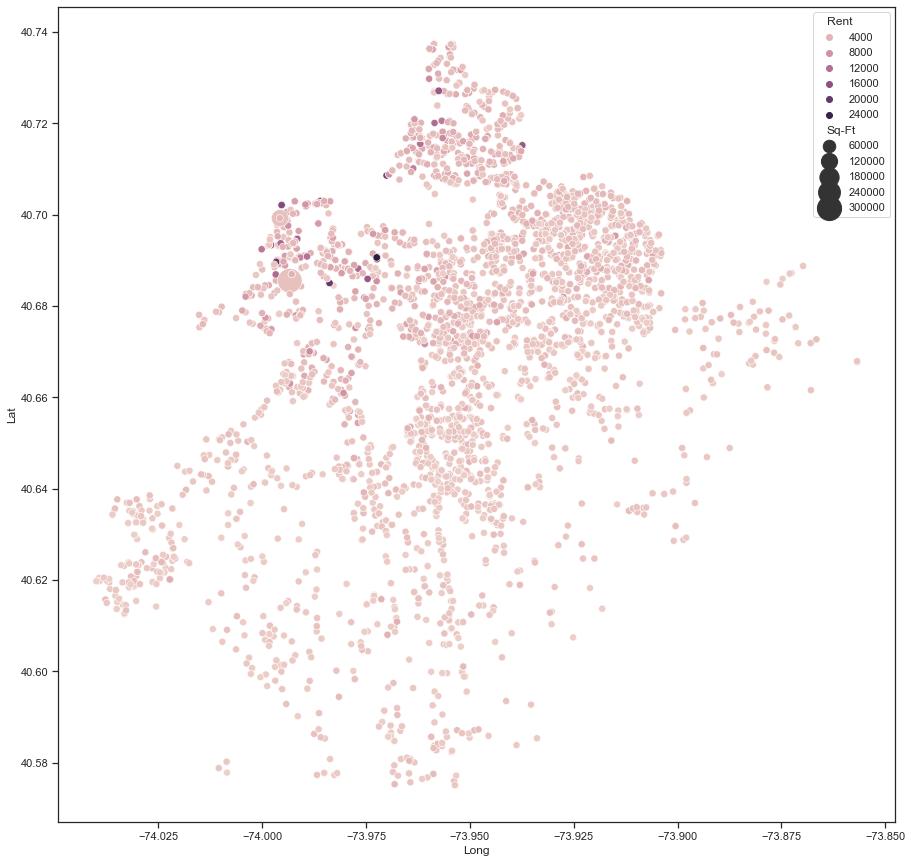

In [169]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Rent', size='Sq-Ft', sizes=(50, 600), size_norm=(min_size, max_size), hue_norm=(min_rent, max_rent))

In [91]:
# rent by zipcode
unique_zips = df['ZipCode'].unique()

<AxesSubplot:xlabel='ZipCode', ylabel='Rent'>

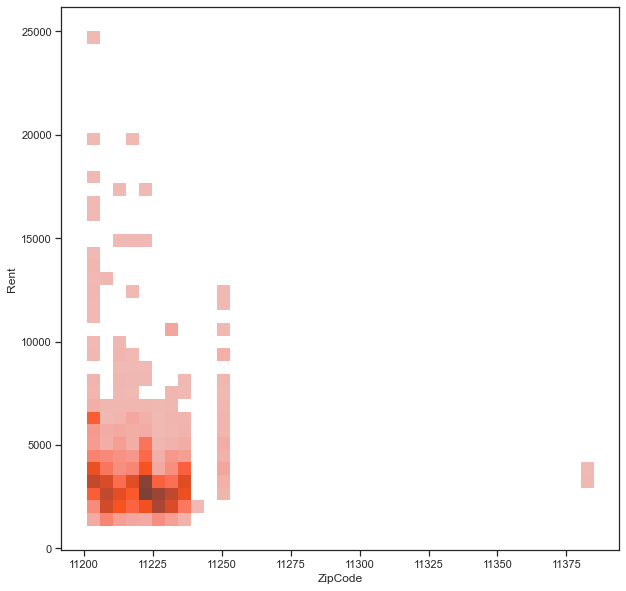

In [100]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="ZipCode", y="Rent", bins=len(unique_zips), color="#F4511E")

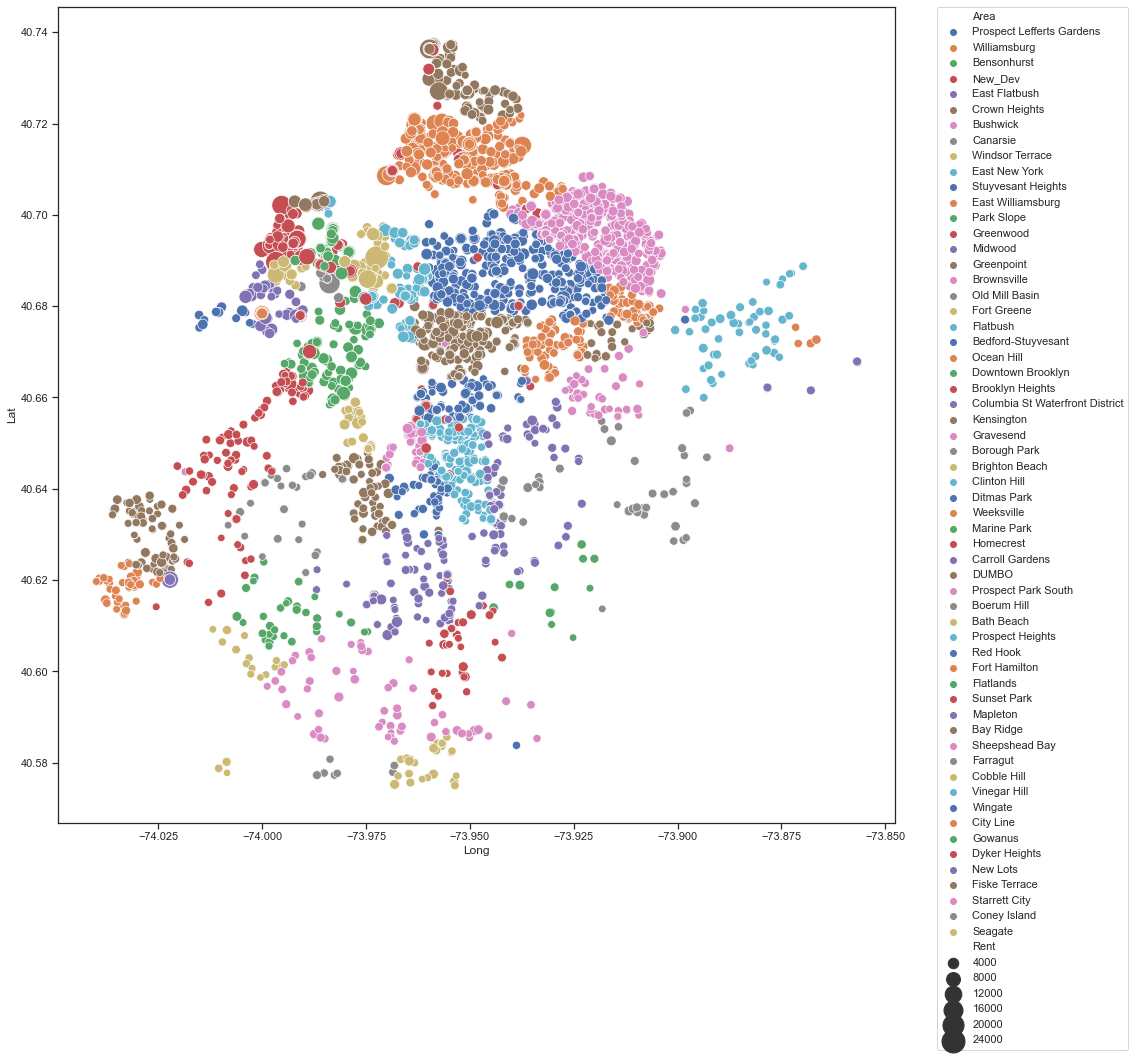

In [124]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Area', size='Rent', sizes=(50, 550), size_norm=(min_rent, max_rent), palette=sns.color_palette('deep', df['Area'].unique().shape[0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


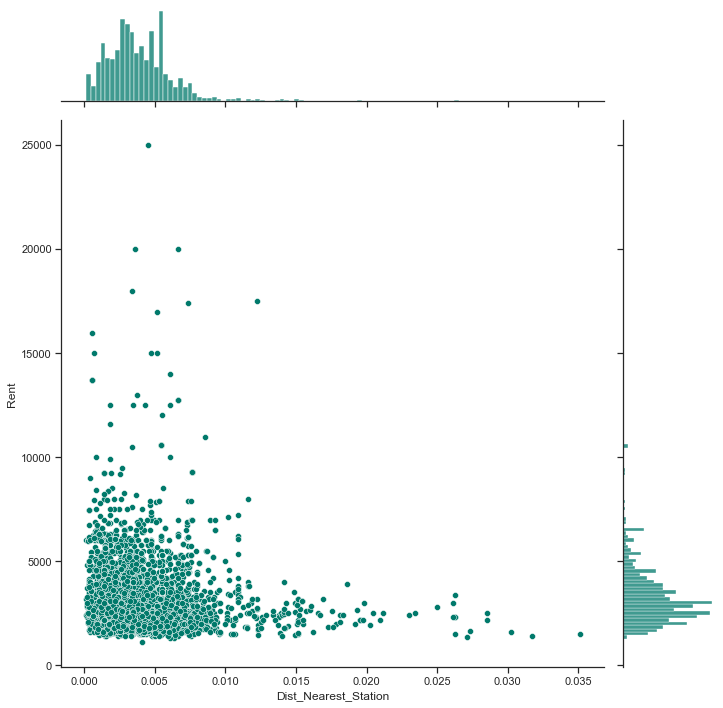

In [129]:
# Rent by distance to train

sns.jointplot(data=df, x='Dist_Nearest_Station', y='Rent', kind="scatter", color="#00796B", height=10)

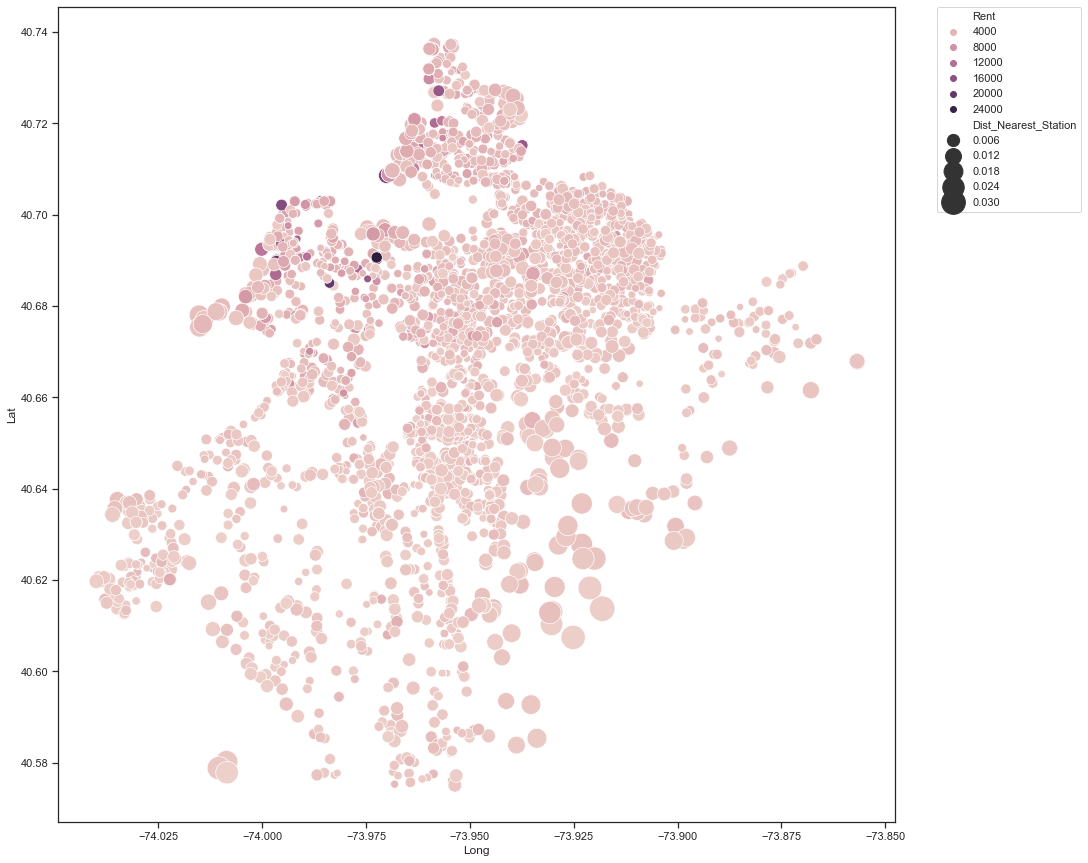

In [141]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Rent', size='Dist_Nearest_Station', sizes=(50, 650), hue_norm=(min_rent, max_rent))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

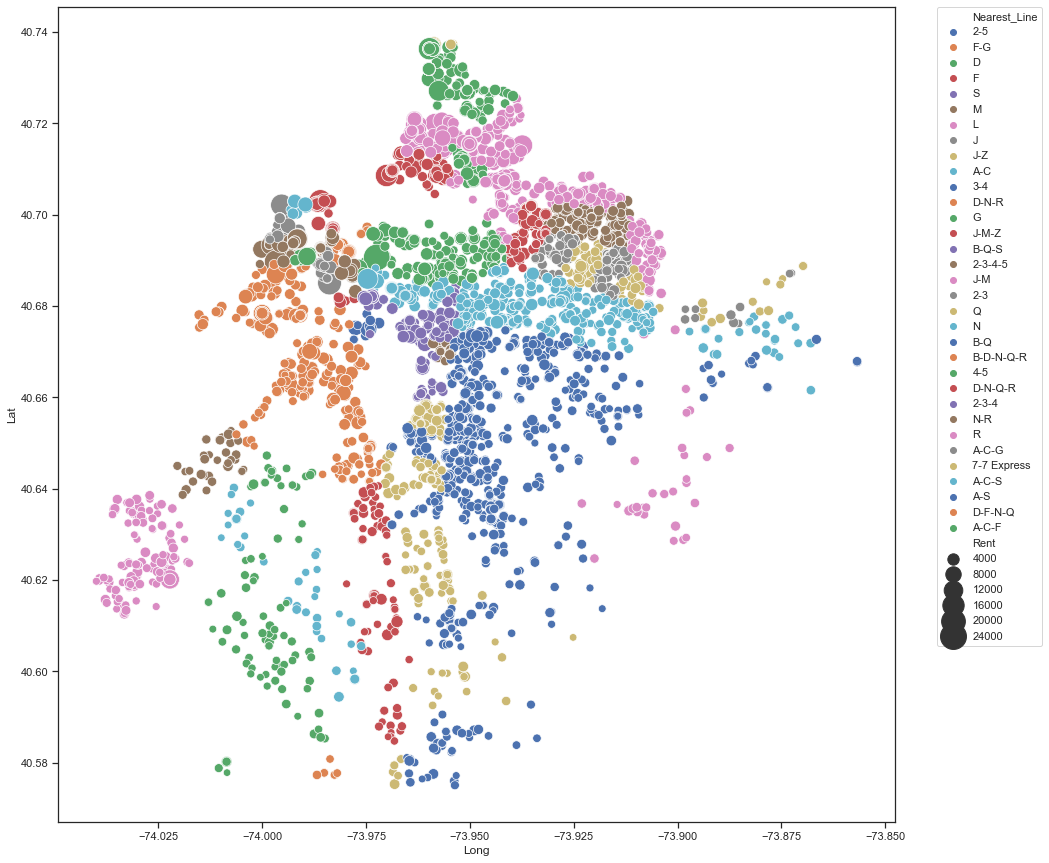

In [143]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Nearest_Line', size='Rent', sizes=(50, 700), size_norm=(min_rent, max_rent), palette=sns.color_palette('deep', df['Nearest_Line'].unique().shape[0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


<AxesSubplot:>

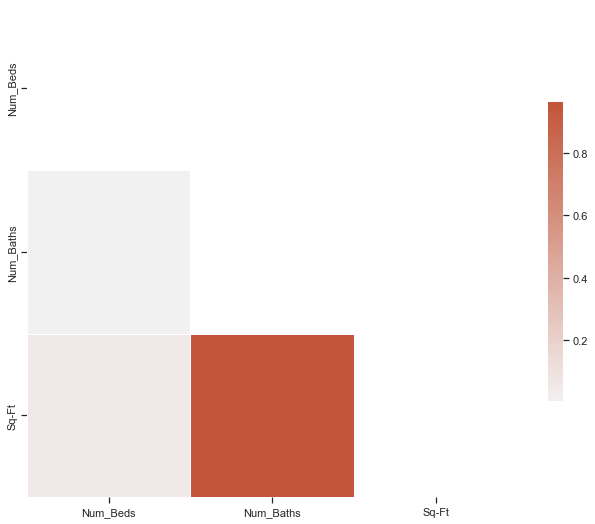

In [144]:
# correlation heatmap between num beds, baths, sqft
df2 =  df[['Num_Beds', 'Num_Baths', 'Sq-Ft']]

corr_mat1 = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

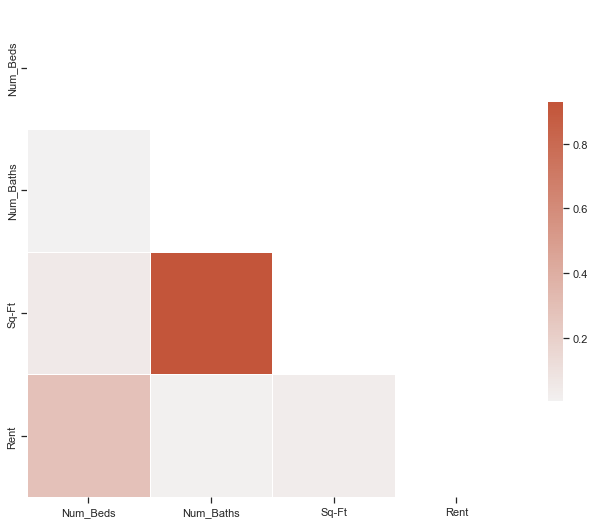

In [145]:
# correlation heatmap of above, incl. rent
df2 =  df[['Num_Beds', 'Num_Baths', 'Sq-Ft', 'Rent']]

corr_mat1 = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

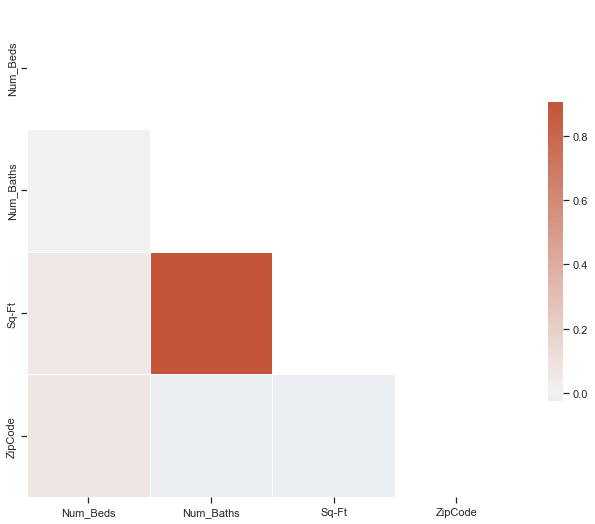

In [148]:
# correlation heatmap of above, incl. zipcode
df2 =  df[['Num_Beds', 'Num_Baths', 'Sq-Ft', 'ZipCode']]

corr_mat1 = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [154]:
df2 =  df[['Num_Beds', 'Num_Baths', 'Sq-Ft', 'ZipCode']]
df2 = pd.get_dummies(df2, prefix=['zip'], columns=['ZipCode'])

<AxesSubplot:>

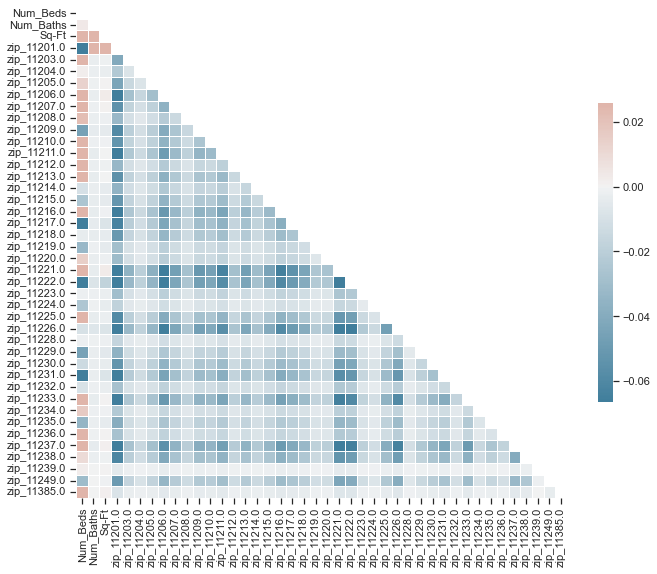

In [156]:
# correlation heatmap of above, incl. zipcode
corr_mat1 = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

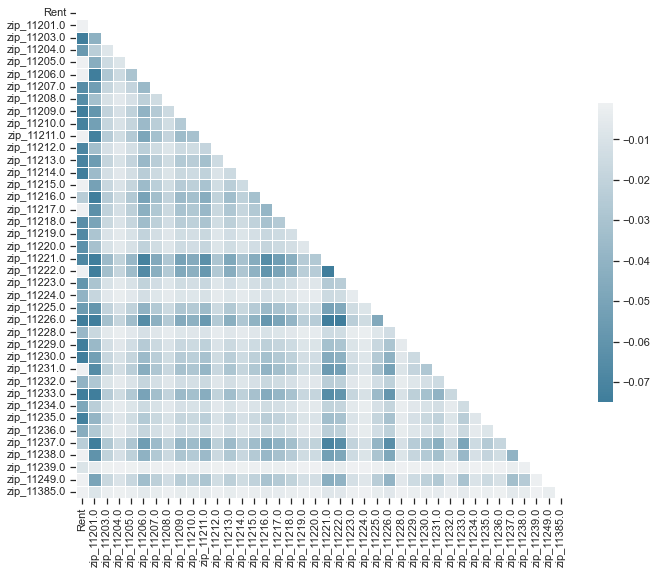

In [157]:
df2 =  df[['ZipCode', 'Rent']]
df2 = pd.get_dummies(df2, prefix=['zip'], columns=['ZipCode'])

corr_mat1 = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

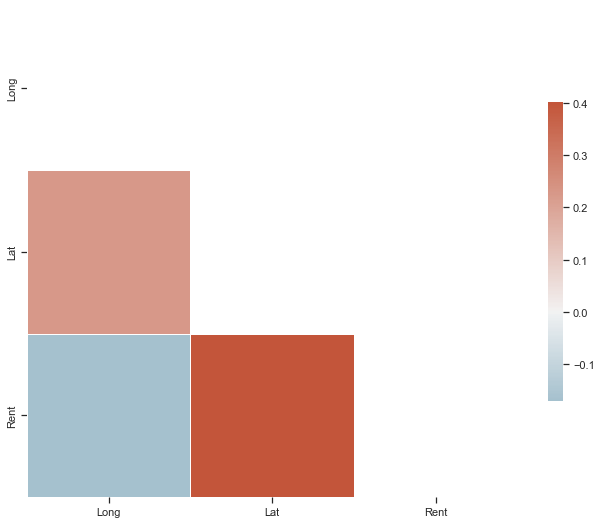

In [158]:
df2 =  df[['Long', 'Lat', 'Rent']]
corr_mat1 = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

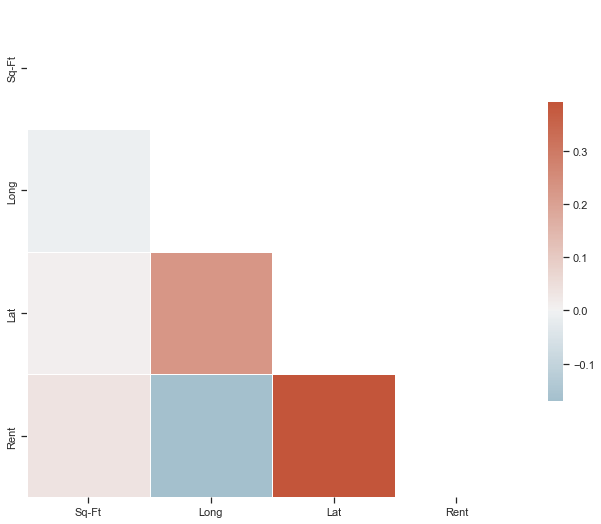

In [170]:
df2 =  df[['Sq-Ft', 'Long', 'Lat', 'Rent']]
corr_mat1 = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [171]:
df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Dist_Nearest_Station,Nearest_Line
0,brooklyn,Prospect Lefferts Gardens,620 Parkside Avenue,3.0,1.0,1067.73,3100.0,-73.952639,40.656024,11226.0,0.002638,2-5
1,brooklyn,Williamsburg,1 N 4th Place,1.0,1.0,600.00,4597.0,-74.000048,40.678412,11231.0,0.00543,F-G
3,brooklyn,Bensonhurst,1651 84th Street,2.0,1.0,600.00,1650.0,-74.004634,40.610703,11214.0,0.004249,D
4,brooklyn,New_Dev,181 Front Street,2.0,2.0,1290.54,6496.0,-73.985988,40.702526,11201.0,0.002925,F
5,brooklyn,East Flatbush,3420 Clarendon Road,1.0,1.0,624.88,1600.0,-73.944233,40.643375,11203.0,0.004935,2-5


<AxesSubplot:>

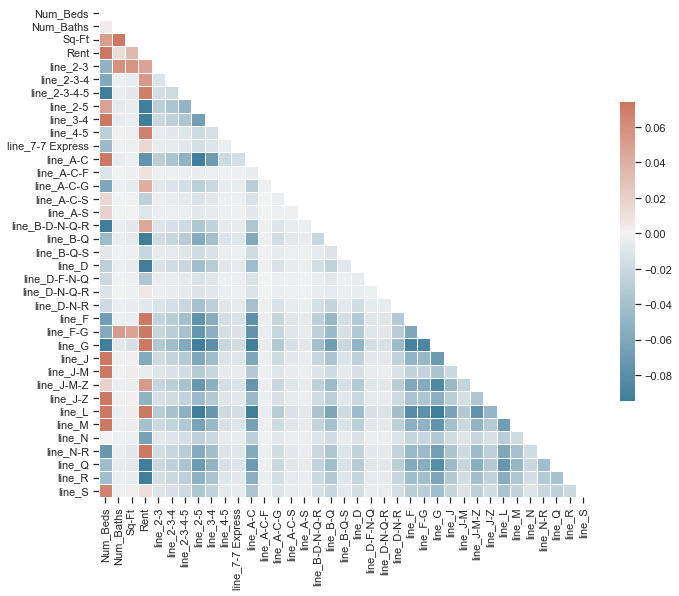

In [183]:
df2 =  df[['Num_Beds', 'Num_Baths', 'Sq-Ft','Nearest_Line', 'Rent']]
df2 = pd.get_dummies(df2, prefix=['line'], columns=['Nearest_Line'])

corr_mat1 = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})